In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SimpleLinearRegressor:
    
    ''' Defines Simple Linear Regressor which finds best fit line for the given data. '''
    
    def __init__(self, X, y):
        '''
        Parameters :
        ------------
        
        X --> Independent Variable, type : pandas.core.series.Series
        y --> Dependent Variable  , type : pandas.core.series.Series  
        '''
        self.X = X
        self.y = y
    
    def fit(self):
        
        self._X_mean = self.X.mean()
        self._y_mean = self.y.mean()
        
        _X_mean_diff = self.X - self._X_mean
        _y_mean_diff = self.y - self._y_mean
        
        self.slope = (_X_mean_diff * _y_mean_diff).sum() / (_X_mean_diff ** 2).sum()
        
        self.intercept = self._y_mean - (self.slope * self._X_mean)
        
        s = "Slope is {0} and y-Intercept is {1}"
        return s.format(self.slope, self.intercept)
    
    def plot_regressor(self):
        plt.figure(figsize=(10, 7))
        plt.scatter(self.X, self.y)
        plt.scatter(self._X_mean, self._y_mean, marker = '^', s=100, color = 'm')
        _y_pred = self.X * self.slope + self.intercept
        plt.plot(self.X, _y_pred, 'g')
        plt.show()
        return
    
    def mse(self):
        ''' Returns Mean Squared Error '''
        _y_pred = self.X * self.slope + self.intercept
        return ((self.y - _y_pred)**2).sum() / len(self.y)
    
    def rmse(self):
        return self.mse()**0.5
    
    def r2_score(self):
        '''
        It’s a statistical measure between 0 and 1 which calculates 
        how similar a regression line is to the data it’s fitted to. 
        If it’s a 1, the model 100% predicts the data variance; 
        if it’s a 0, the model predicts none of the variance.
        '''
        _y_pred = self.X * self.slope + self.intercept
        line_1_sum = ((self.y - _y_pred) ** 2).sum()
        line_2_sum = ((self.y - self._y_mean) ** 2).sum()
        # print(line_1_sum, line_2_sum)
        r2_score = (line_2_sum - line_1_sum) / line_2_sum
        
        print("R2 Score = {}".format(r2_score))
        return r2_score

In [3]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

In [4]:
df = pd.DataFrame({'X' : x, 'y' : y})
df.head()

,X,y
0,-3.292157,-53.468412
1,0.799528,-1.262560
2,-0.936214,-3.506193
3,-4.722680,-107.223200
4,-3.602674,-49.131950


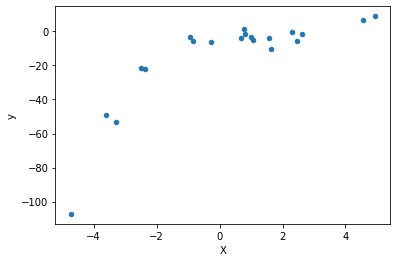

In [6]:
df.plot('X', 'y', 'scatter')

In [7]:
pol = SimpleLinearRegressor(df['X'], df['y'])

In [8]:
pol.fit()

'Slope is 8.292387551556109 and y-Intercept is -16.796450673731307'

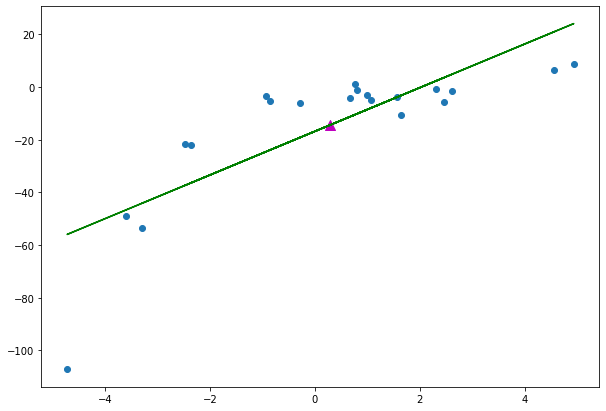

In [9]:
pol.plot_regressor()

In [10]:
pol.r2_score()

R2 Score = 0.6386750054827147


0.6386750054827147